# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [101]:
# Importando as Bibliotecas
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [102]:
# Carregando os dados
base = pd.read_csv("base.csv")
base

,Unnamed: 0,sexo,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,...,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_Co-op apartment,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,0,0,58.832877,3.106849,1,0,0,0,2.0,...,1,0,0,0,0,1,0,0,0,0
1,1,1,0,52.356164,8.358904,1,0,1,1,1.0,...,0,0,1,0,0,1,0,0,0,0
2,2,1,0,52.356164,8.358904,1,0,1,1,1.0,...,0,0,1,0,0,1,0,0,0,0
3,3,0,0,46.224658,2.106849,1,1,1,1,2.0,...,1,0,0,0,0,1,0,0,0,0
4,4,1,0,29.230137,3.021918,1,0,0,0,2.0,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16645,16645,1,0,54.109589,9.884932,1,0,0,0,2.0,...,0,0,0,0,0,1,0,0,0,0
16646,16646,1,0,43.389041,7.380822,1,1,1,0,2.0,...,1,0,0,0,0,1,0,0,0,0
16647,16647,0,0,30.005479,9.800000,1,1,0,0,2.0,...,1,0,0,0,0,1,0,0,0,0
16648,16648,0,0,30.005479,9.800000,1,1,0,0,2.0,...,1,0,0,0,0,1,0,0,0,0


In [103]:
# Removendo a coluna "Unnamed: 0"
base = base.drop(columns='Unnamed: 0')
base

,sexo,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau,...,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_Co-op apartment,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,0,58.832877,3.106849,1,0,0,0,2.0,False,...,1,0,0,0,0,1,0,0,0,0
1,1,0,52.356164,8.358904,1,0,1,1,1.0,False,...,0,0,1,0,0,1,0,0,0,0
2,1,0,52.356164,8.358904,1,0,1,1,1.0,False,...,0,0,1,0,0,1,0,0,0,0
3,0,0,46.224658,2.106849,1,1,1,1,2.0,False,...,1,0,0,0,0,1,0,0,0,0
4,1,0,29.230137,3.021918,1,0,0,0,2.0,False,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16645,1,0,54.109589,9.884932,1,0,0,0,2.0,True,...,0,0,0,0,0,1,0,0,0,0
16646,1,0,43.389041,7.380822,1,1,1,0,2.0,True,...,1,0,0,0,0,1,0,0,0,0
16647,0,0,30.005479,9.800000,1,1,0,0,2.0,True,...,1,0,0,0,0,1,0,0,0,0
16648,0,0,30.005479,9.800000,1,1,0,0,2.0,True,...,1,0,0,0,0,1,0,0,0,0


In [104]:
# Conferindo os tipos de colunas:
base.dtypes

sexo                                        int64
qtd_filhos                                  int64
idade                                     float64
tempo_emprego                             float64
possui_celular                              int64
possui_fone_comercial                       int64
possui_fone                                 int64
possui_email                                int64
qt_pessoas_residencia                     float64
mau                                          bool
posse_de_veiculo_Y                          int64
posse_de_imovel_Y                           int64
tipo_renda_Commercial associate             int64
tipo_renda_Pensioner                        int64
tipo_renda_State servant                    int64
tipo_renda_Student                          int64
tipo_renda_Working                          int64
educacao_Academic degree                    int64
educacao_Higher education                   int64
educacao_Incomplete higher                  int64


In [105]:
# Coferindo se há dados faltantes
base.isna().sum()

sexo                                      0
qtd_filhos                                0
idade                                     0
tempo_emprego                             0
possui_celular                            0
possui_fone_comercial                     0
possui_fone                               0
possui_email                              0
qt_pessoas_residencia                     0
mau                                       0
posse_de_veiculo_Y                        0
posse_de_imovel_Y                         0
tipo_renda_Commercial associate           0
tipo_renda_Pensioner                      0
tipo_renda_State servant                  0
tipo_renda_Student                        0
tipo_renda_Working                        0
educacao_Academic degree                  0
educacao_Higher education                 0
educacao_Incomplete higher                0
educacao_Lower secondary                  0
educacao_Secondary / secondary special    0
estado_civil_Civil marriage     

In [106]:
# Separando os dados para o treinamento e para validação
X = base.drop(columns='mau')
y = base['mau']
X_treino, X_validacao, y_treino, y_validacao = train_test_split(X, 
                                                                y, 
                                                                test_size=0.3, 
                                                                random_state=100)

In [107]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16650 entries, 0 to 16649
Data columns (total 32 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   sexo                                    16650 non-null  int64  
 1   qtd_filhos                              16650 non-null  int64  
 2   idade                                   16650 non-null  float64
 3   tempo_emprego                           16650 non-null  float64
 4   possui_celular                          16650 non-null  int64  
 5   possui_fone_comercial                   16650 non-null  int64  
 6   possui_fone                             16650 non-null  int64  
 7   possui_email                            16650 non-null  int64  
 8   qt_pessoas_residencia                   16650 non-null  float64
 9   posse_de_veiculo_Y                      16650 non-null  int64  
 10  posse_de_imovel_Y                       16650 non-null  in

In [108]:
y

0        False
1        False
2        False
3        False
4        False
         ...  
16645     True
16646     True
16647     True
16648     True
16649     True
Name: mau, Length: 16650, dtype: bool

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [109]:
# Definindo um objeto com a função da árvore de decisão
clf = DecisionTreeClassifier(random_state=100)
clf

DecisionTreeClassifier(random_state=100)

In [110]:
# Usando os dados de treinamento no modelo 
clf = clf.fit(X_treino, y_treino)
clf

DecisionTreeClassifier(random_state=100)

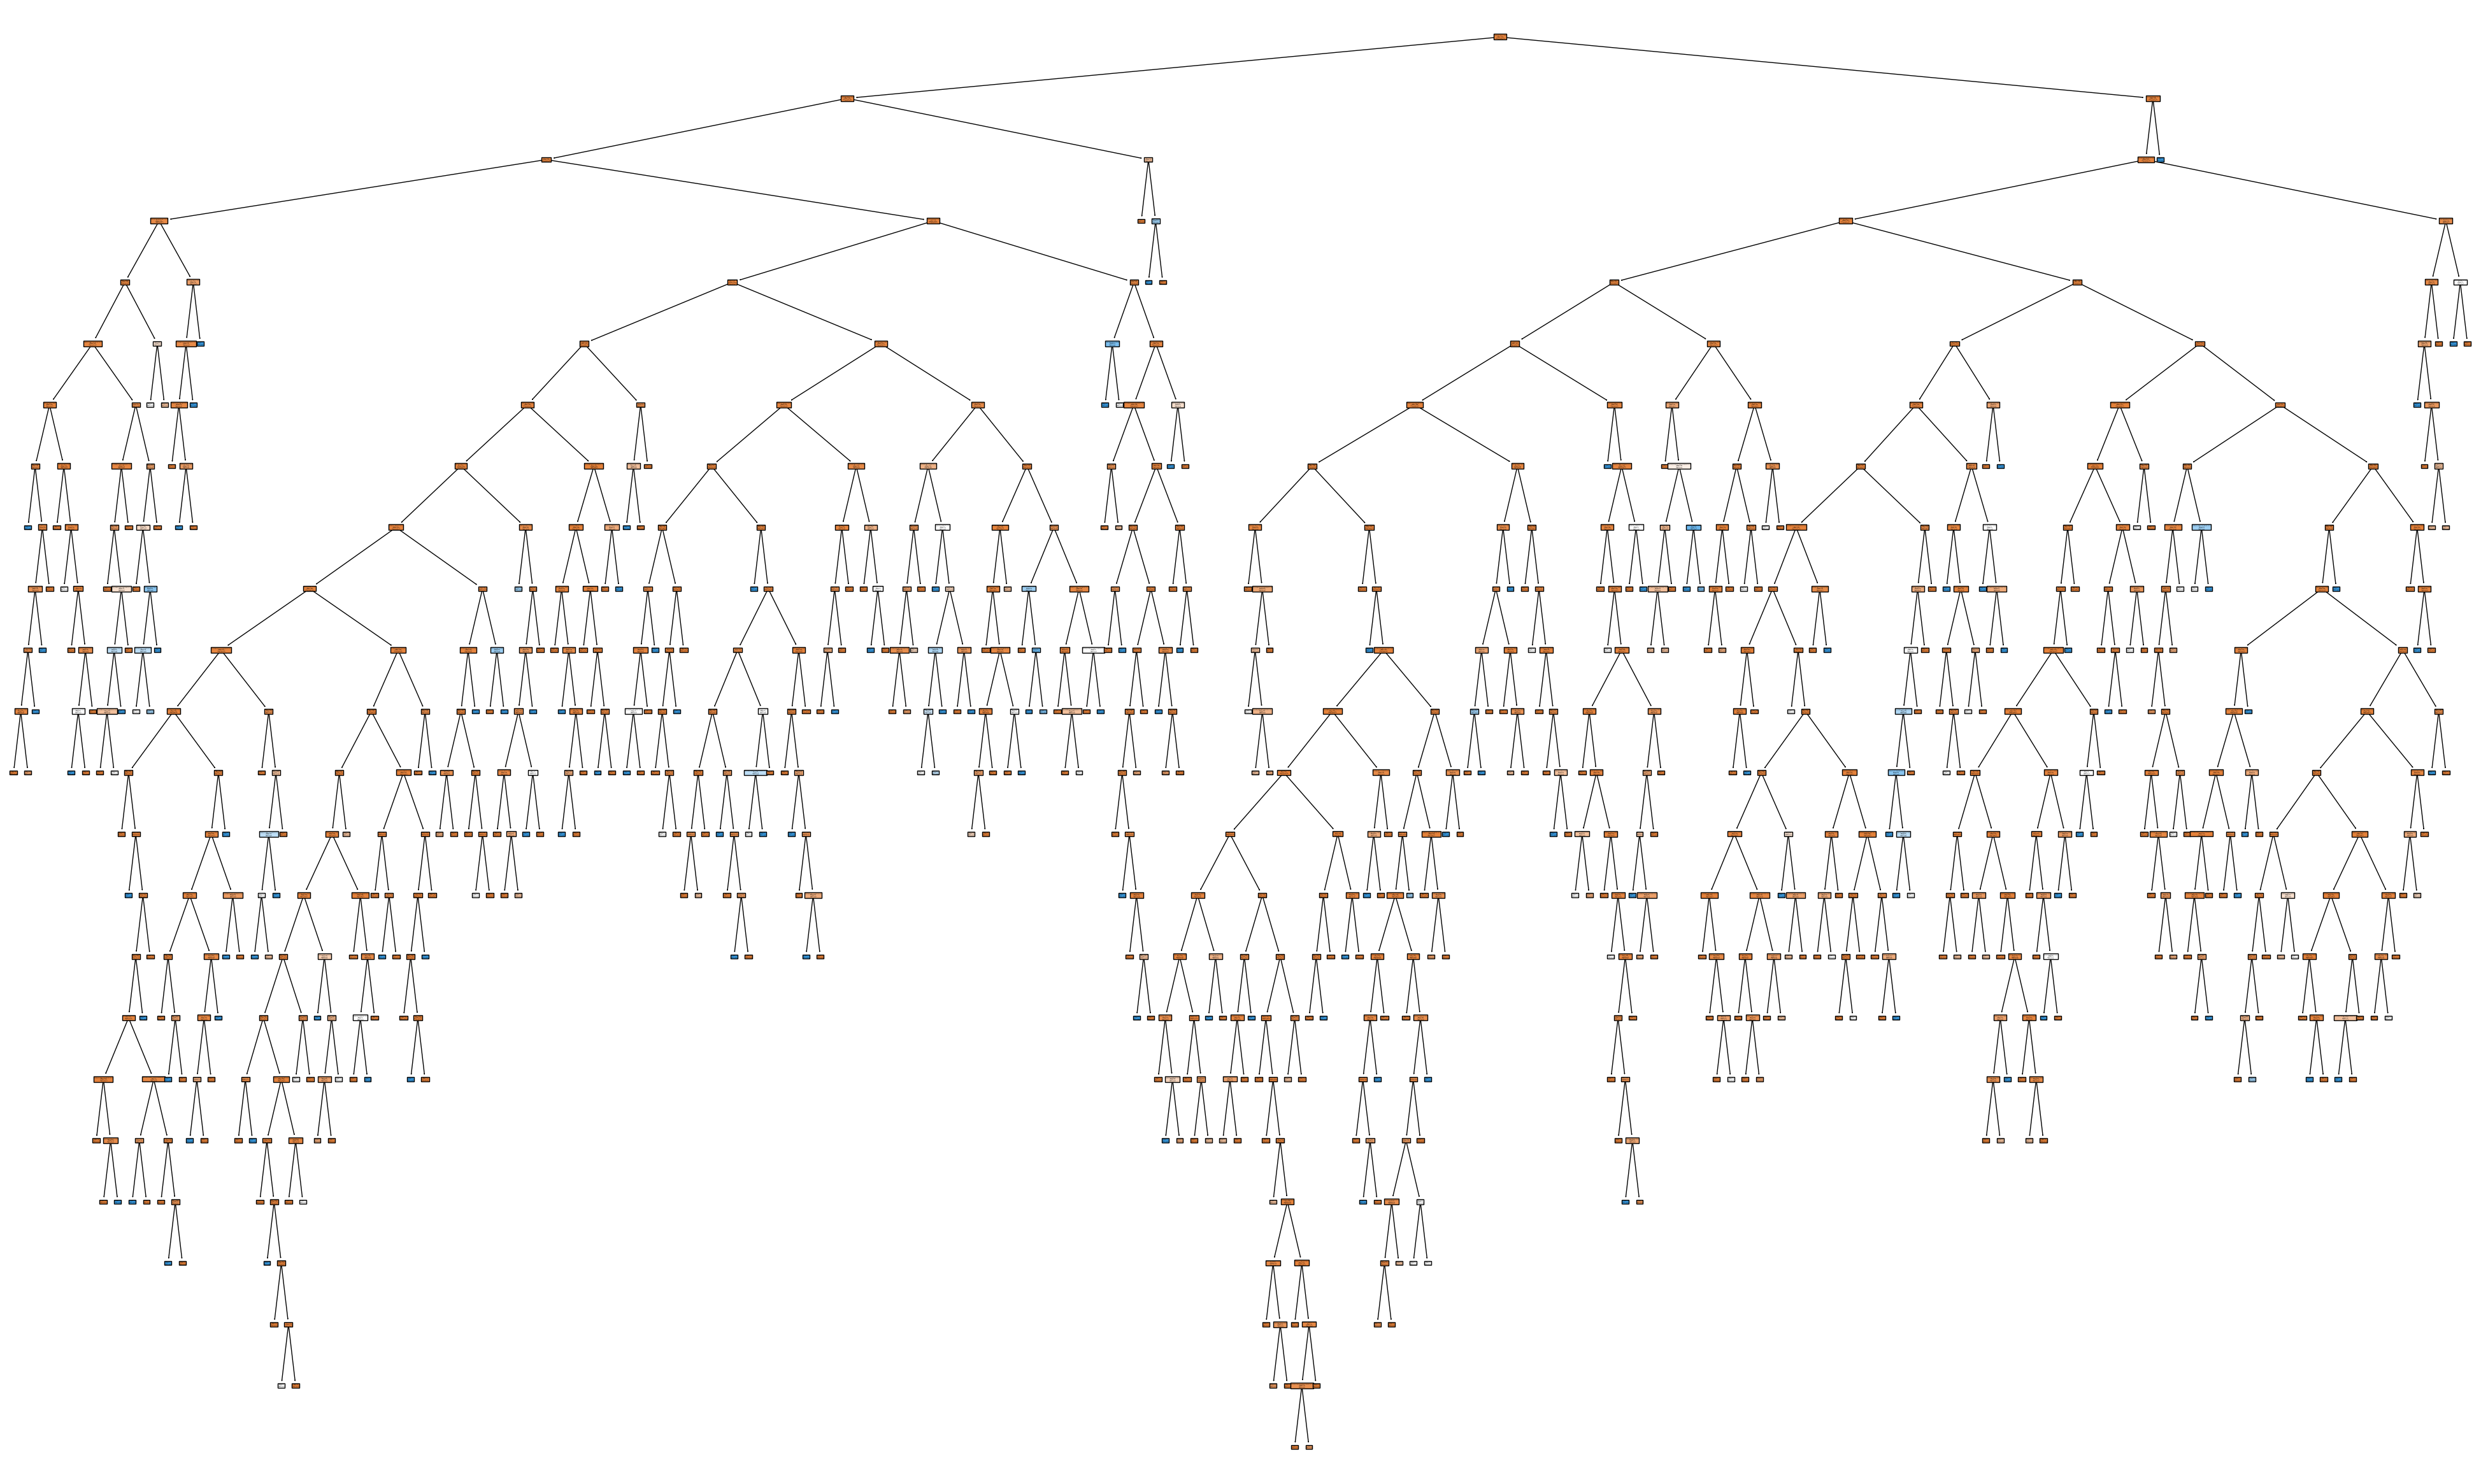

In [111]:
# Visualização da árvore
plt.figure(figsize=(50,30))
plot_tree(clf, 
          filled=True,
          class_names=['bom', 'mau'],
          feature_names = X_treino.columns);

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


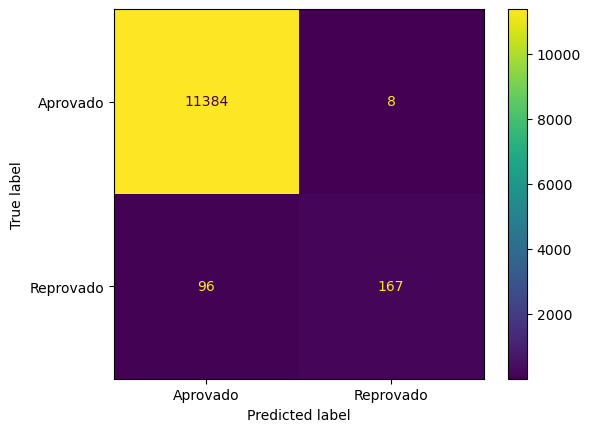

In [112]:
# Matriz de confusão
plot_confusion_matrix(clf, X_treino, y_treino, display_labels=['Aprovado', 'Reprovado']);

In [113]:
# Cálculo da acurácia
predict = clf.predict(X_treino)
accuracy_score(y_treino, predict)

0.991076791076791

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

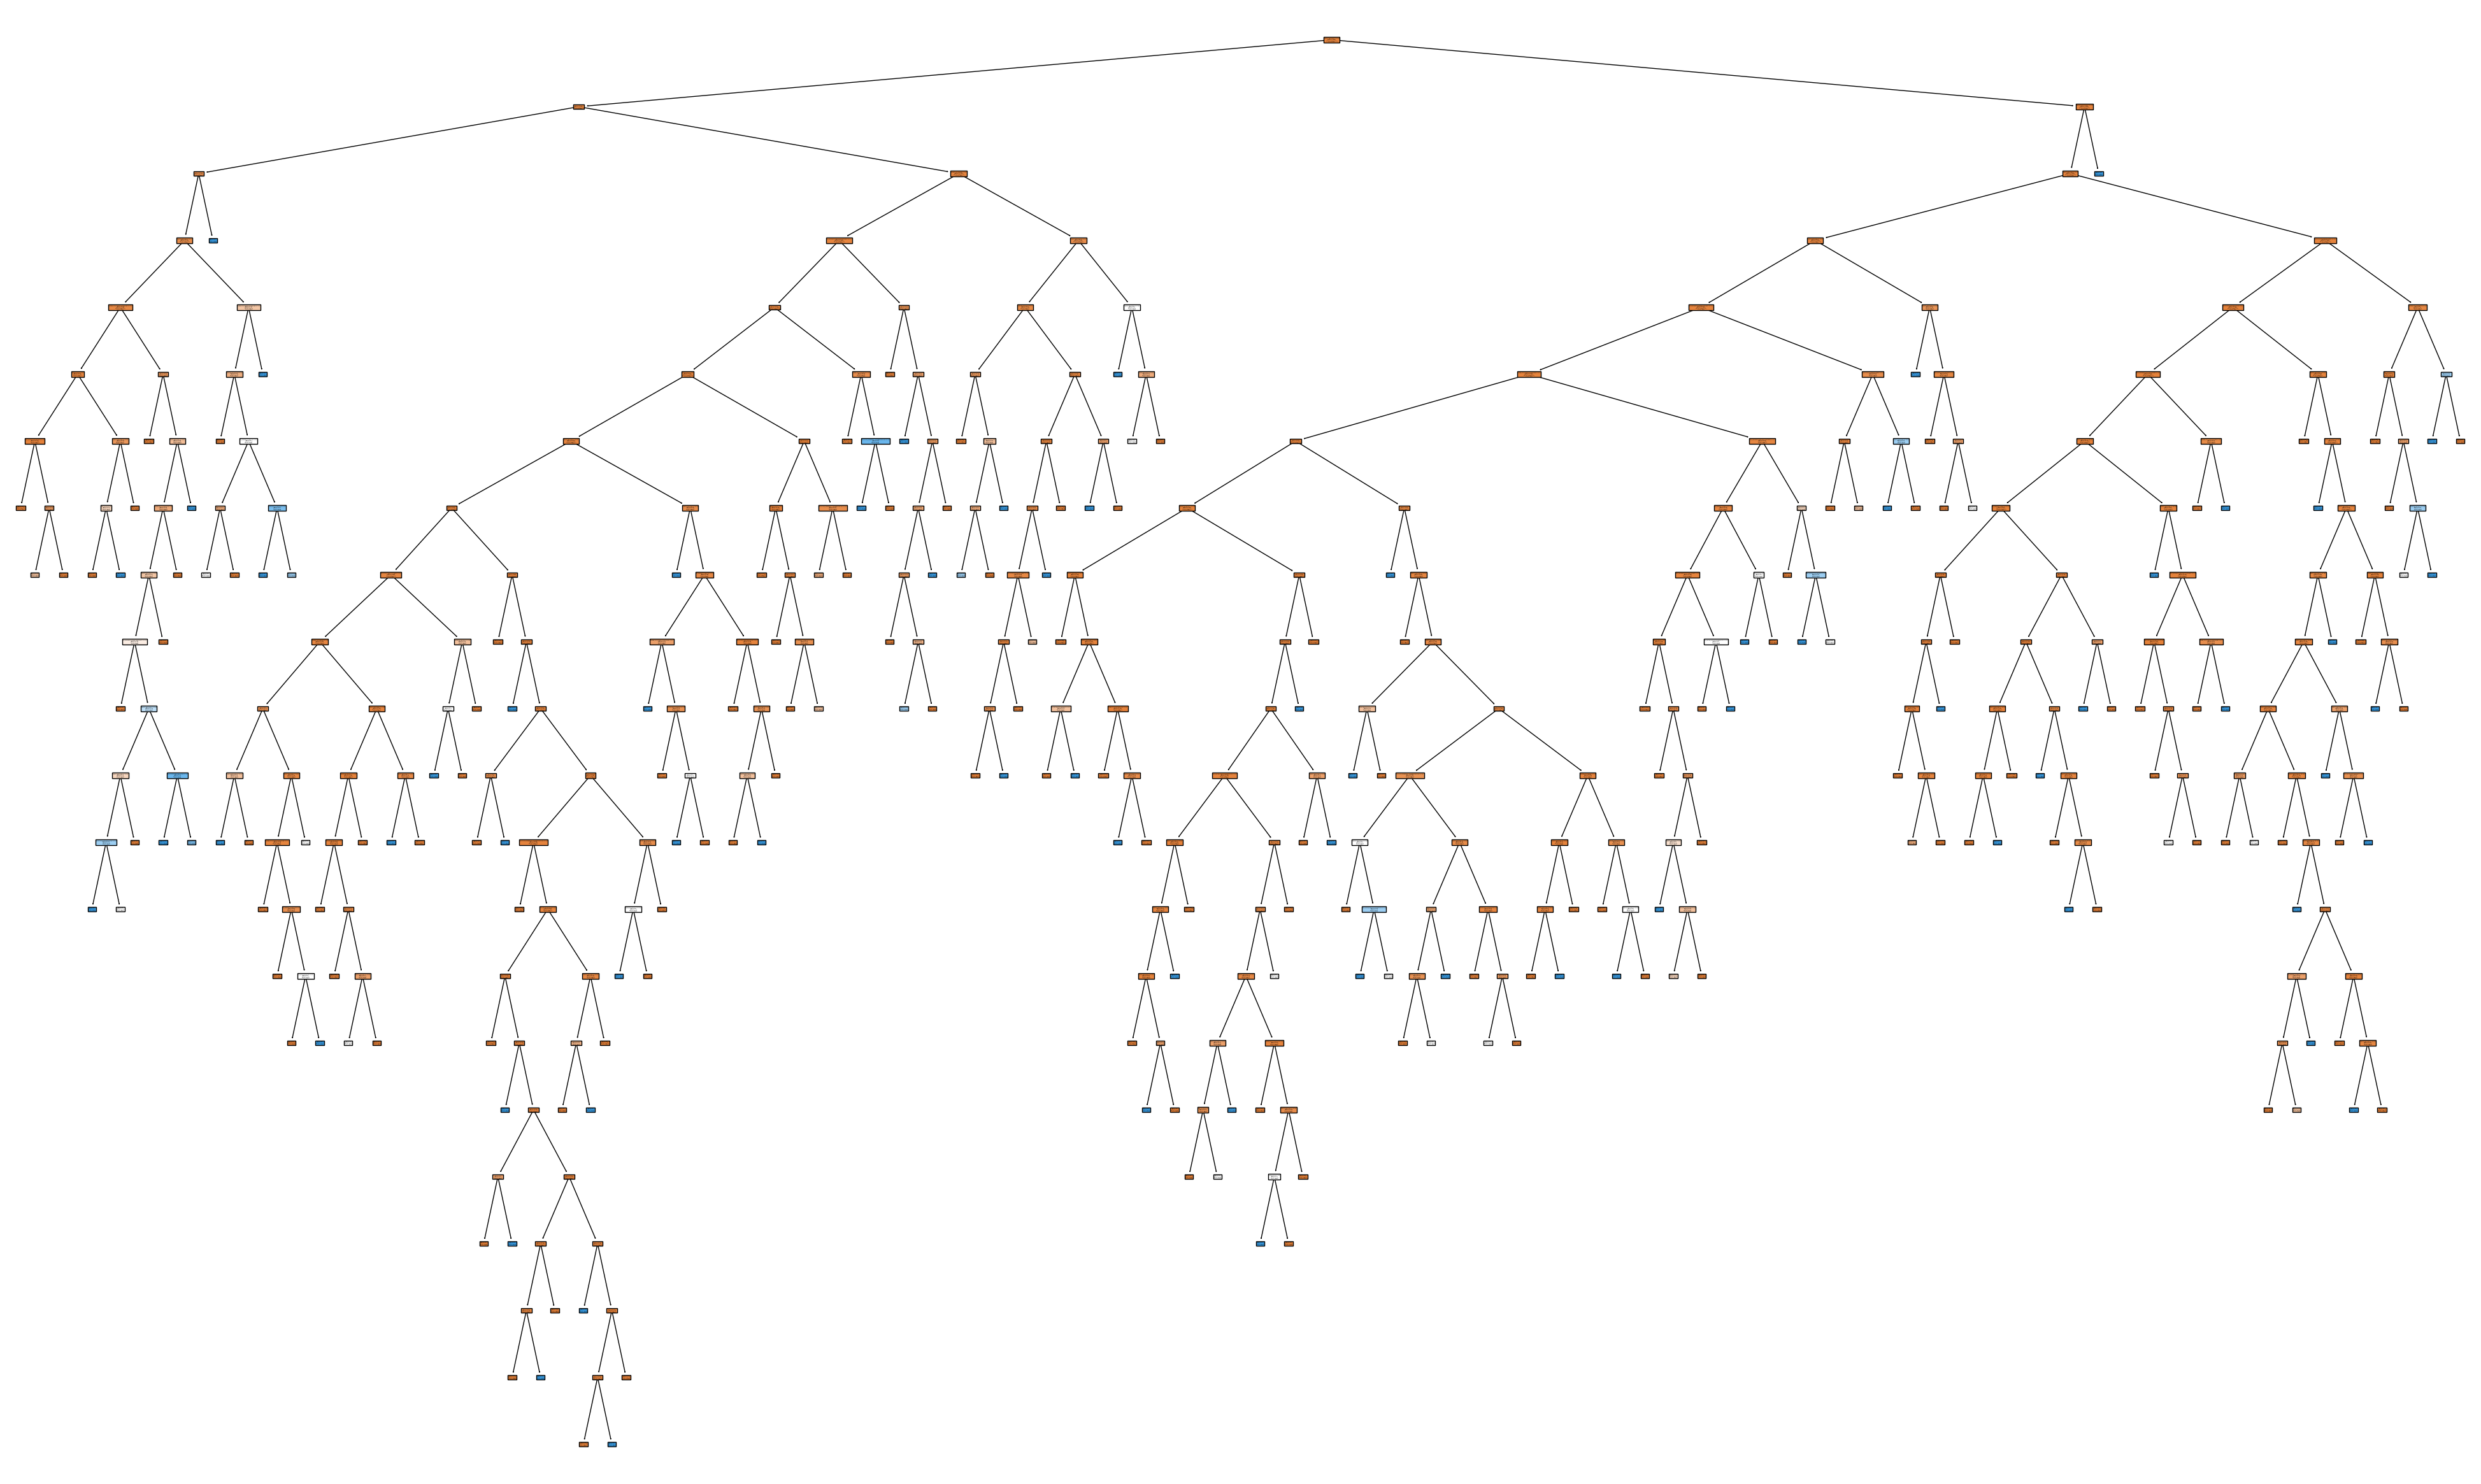

In [114]:
# Produzindo a árvore de decisão com os dados de validação
clf_teste = DecisionTreeClassifier(random_state=100)
clf_teste = clf_teste.fit(X_validacao, y_validacao)
plt.figure(figsize=(50,30))
plot_tree(clf_teste, 
          filled=True,
          class_names=['bom', 'mau'],
          feature_names = X_validacao.columns);

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


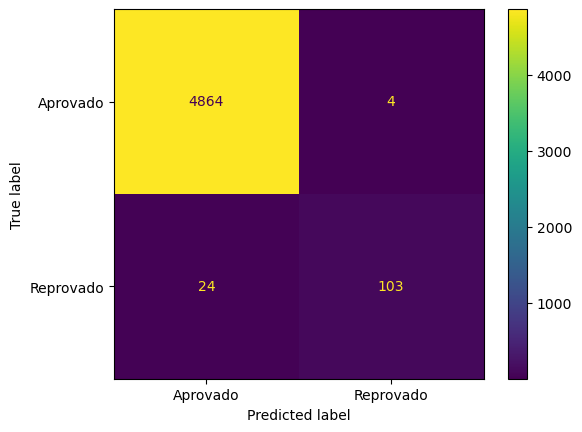

In [115]:
# Visualizando a matriz de confusão para a base de teste
plot_confusion_matrix(clf_teste, X_validacao, y_validacao, display_labels=['Aprovado', 'Reprovado']);

In [116]:
# Cálculo e comparação da acurácia
predict = clf.predict(X_validacao)
accuracy_score(y_validacao, predict)

0.9681681681681682

Percebe-se que a acurácia da base de teste (~ 0.968) é levemente inferior à acurácia da base de treino (~ 0.991). Ainda assim, ambas as acurácias foram próximas a 1.

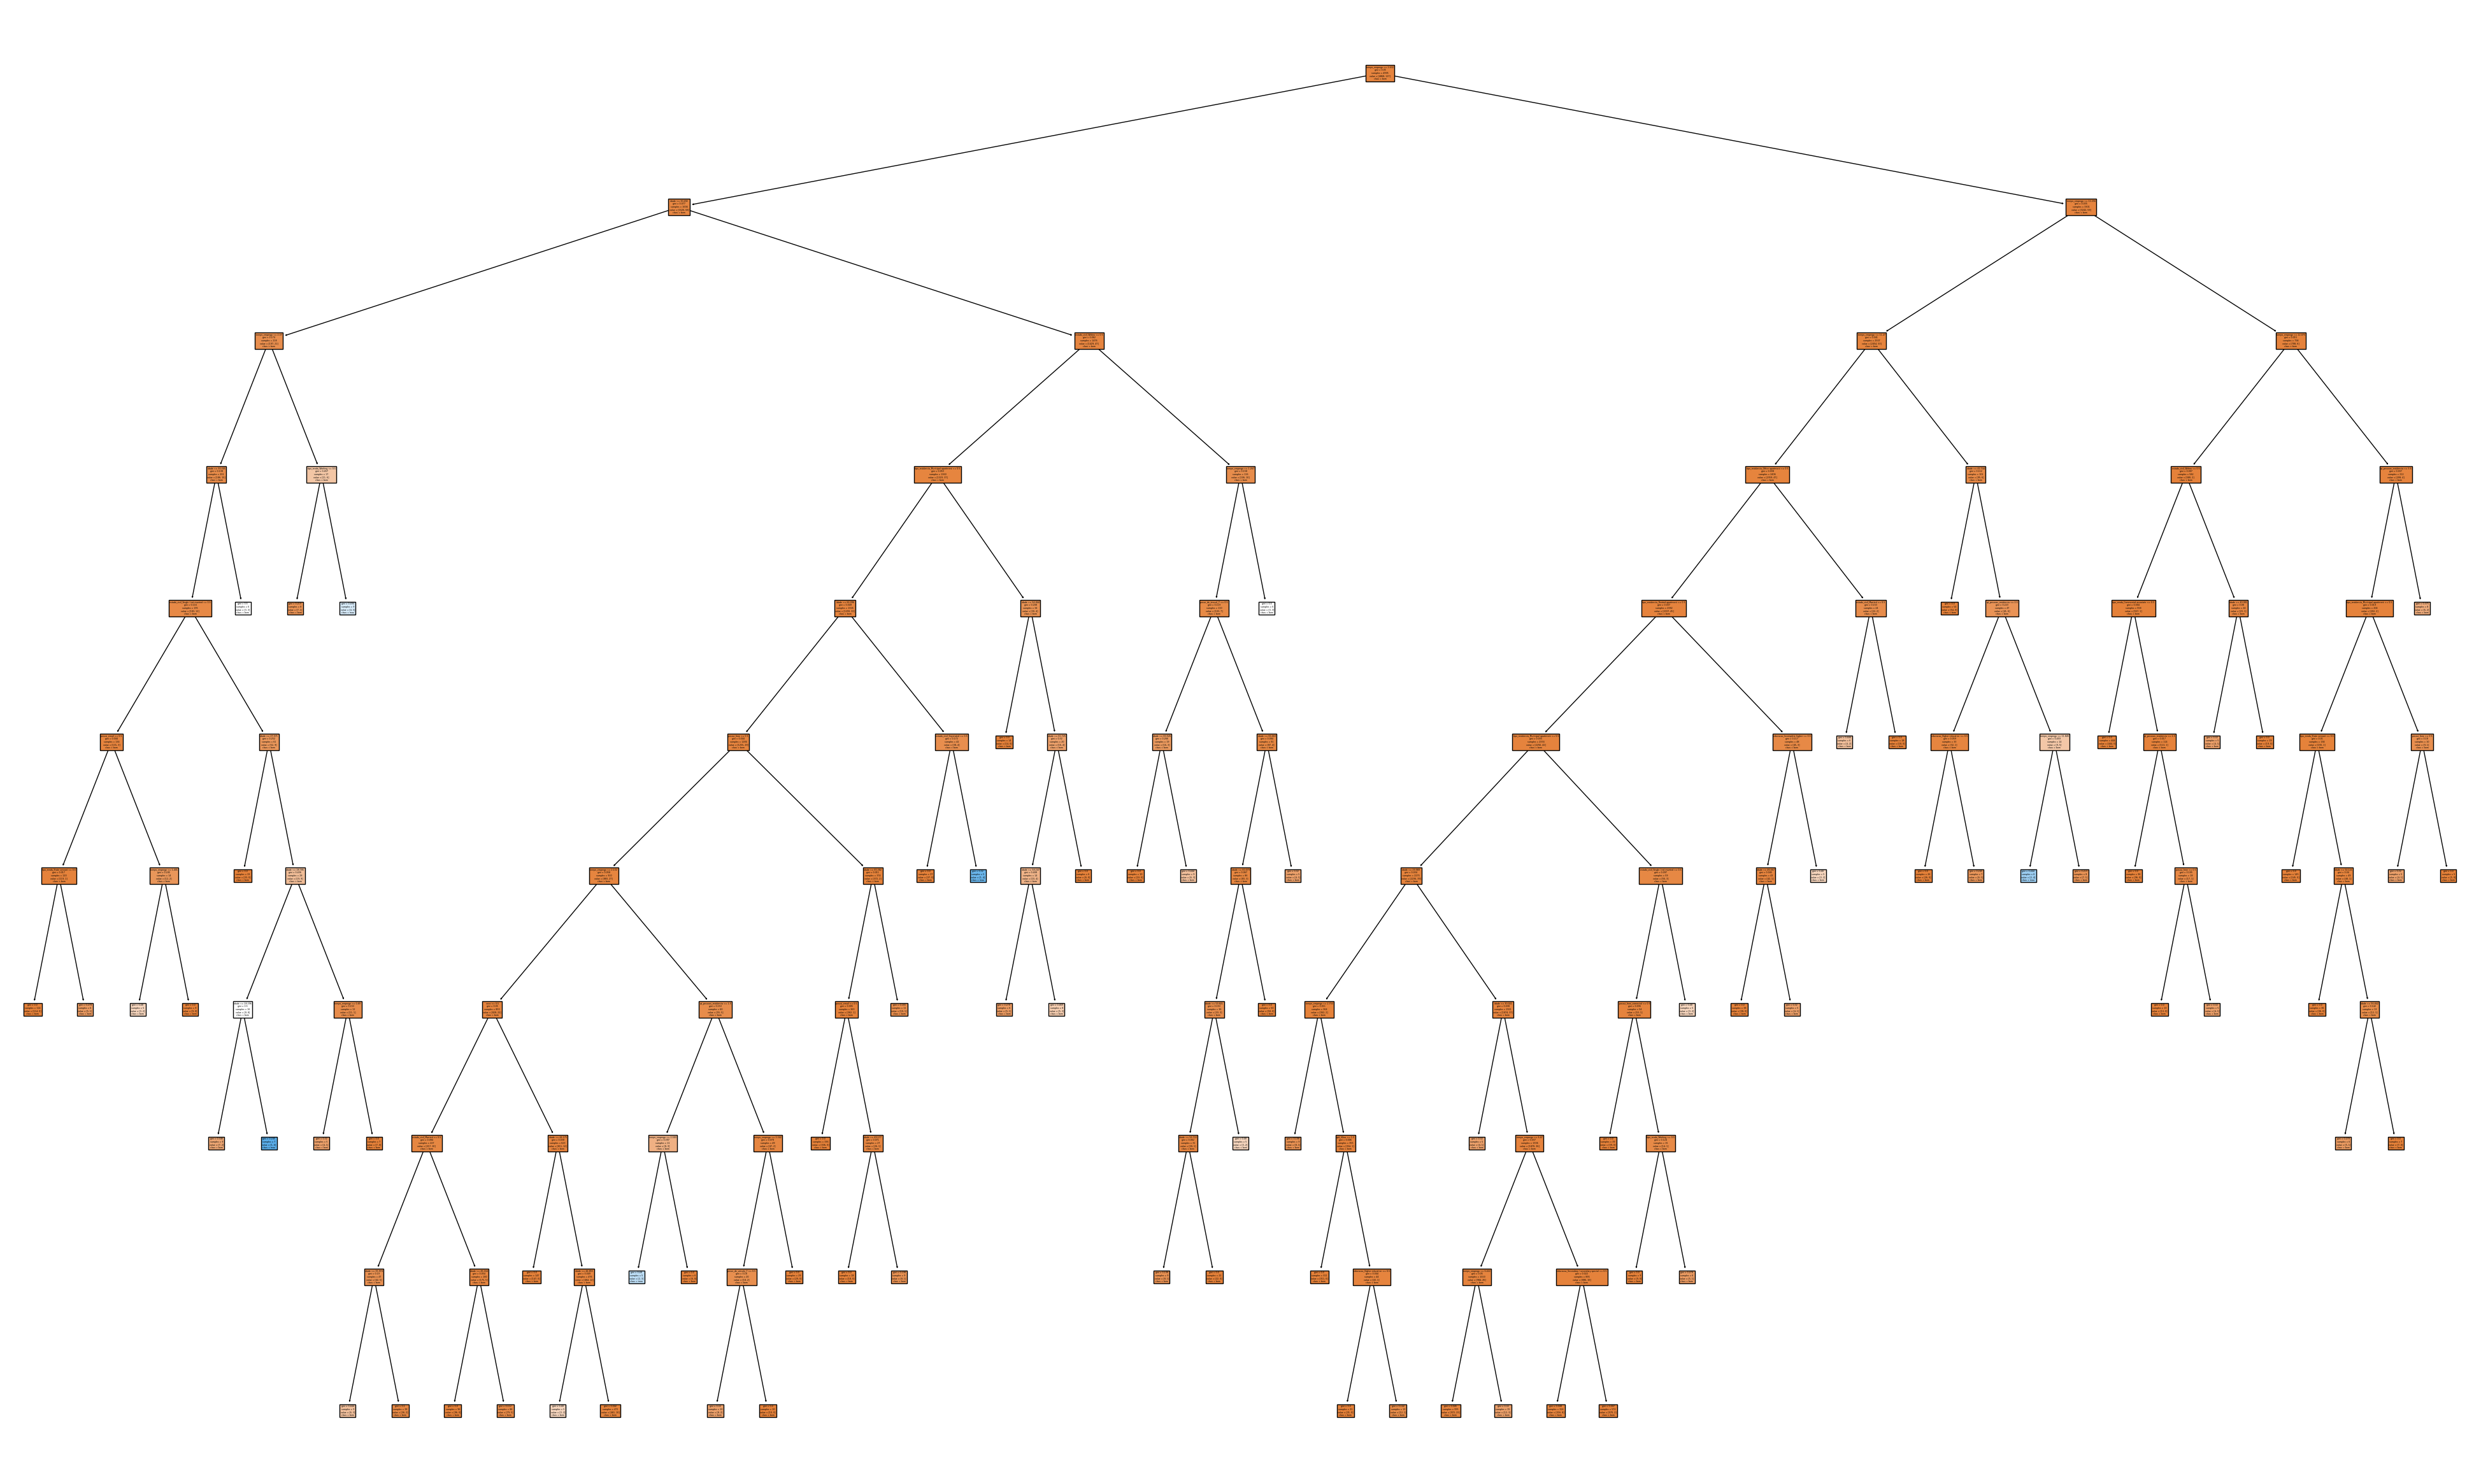

In [117]:
# Visualização da árvore de decisão com as novas características requisitadas
clf_novo = DecisionTreeClassifier(min_samples_leaf=5, max_depth=10, random_state=123)
clf_novo = clf_novo.fit(X_validacao, y_validacao)
plt.figure(figsize=(50,30))
plot_tree(clf_novo, 
          filled=True,
          class_names=['bom', 'mau'],
          feature_names = X_validacao.columns);

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


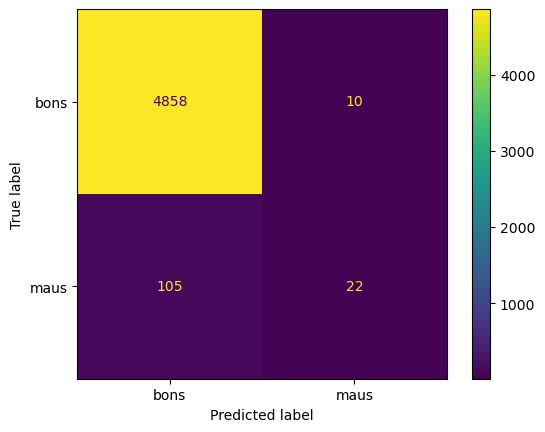

In [118]:
# Matriz de Classificação da nova árvore
plot_confusion_matrix(clf_novo, X_validacao, y_validacao, display_labels=['bons', 'maus']);

In [119]:
# Proporção total de proponentes classificados como 'maus'
(22 + 10) / (4858 + 105 + 10 + 22)

0.006406406406406407

In [120]:
# Proporção dos clientes 'maus' que foram classicados 'maus'
22 / (4858 + 105 + 10 + 22)

0.004404404404404405

A nova matriz não deve ter apresentado uma acurácia tão boa em relação à anterior, uma vez que a maior parte dos clientes "maus" foram classificados como "bons" (105 dos 137). A proporção total de proponentes que foram classicados como maus foi de 0.0064, sendo que a proporção dos "maus" classificados como maus foi de 0.0044. Tais proporções são bem inferiores à matriz de confusão da avaliação original, sendo que nesta, as proporções foram 0.0214 e 0.0206.

In [121]:
# Cálculo da nova acurácia em que todos são 'bons'
4868 / (4858 + 10 + 22 + 105)

0.9745745745745745

O cálculo da acurácia consiste na soma dos clientes que são 'bons' classificados como 'bons' e dos clientes 'maus' classificados como 'maus' dividida pelo total de clientes. Ou seja, 

acurácia = (Quantidade de bons x bons + Quantidade de maus x maus) / Total de Clientes

Classificando todos os clientes como 'bons' (4995), sabendo que, na verdade, há 32 clientes 'maus' nos dados de validação, a acurácia ficaria:

acurácia = ((4995 - 32) + 0) / 4995 = 0.975 (valor obtido acima)

Ou seja, ela ficaria muito próxima de 1, apesar que seja de forma errônea. Isso se deve ao fato do número de clientes 'maus' ser muito pequeno em relação ao número de clientes 'bons' neste conjunto de dados utilizados.